In [50]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_excel('1688640705_hr_comma_sep.xlsx')
dataset

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
#step1: check if we have a missing values. As we see, we don't have any missing values (all of the data are non-null).
dataset.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df = dataset.drop(['sales', 'salary'], axis =1)

In [8]:
corr_matrix = df.corr()

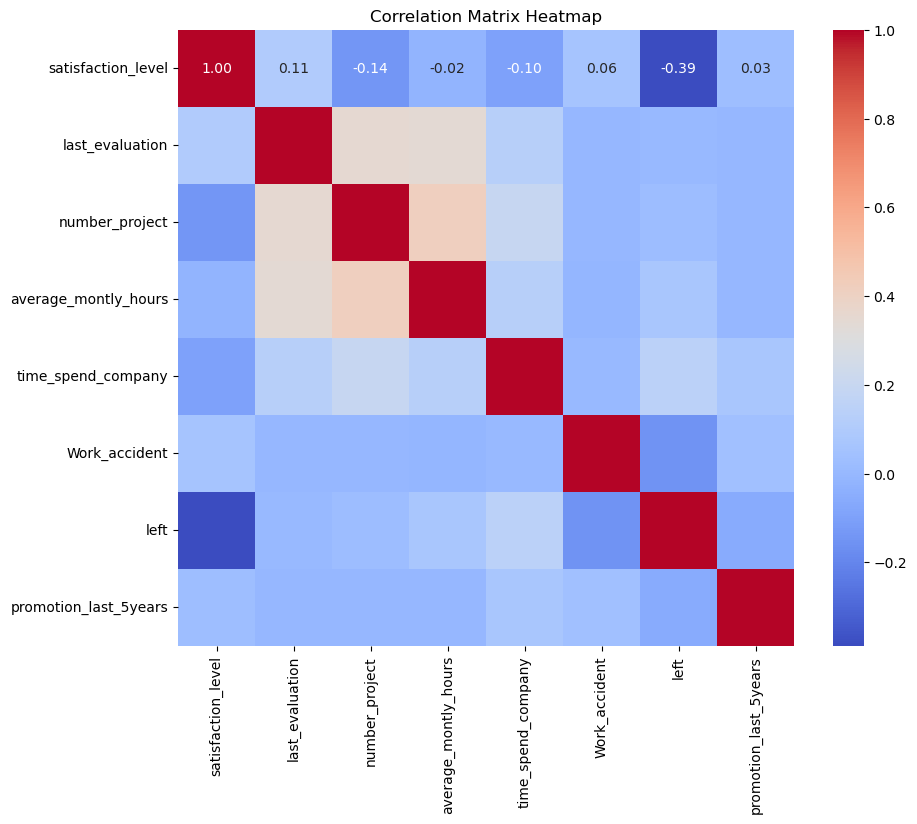

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(
    corr_matrix, 
    annot=True,          
    fmt=".2f",           
    cmap="coolwarm",     
    cbar=True,           
    square=True          
)

# Add a title for better context
plt.title("Correlation Matrix Heatmap")
plt.show()

__Observation:__
 - Weak or negative linear relationships between features.

C:\Users\al1hj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


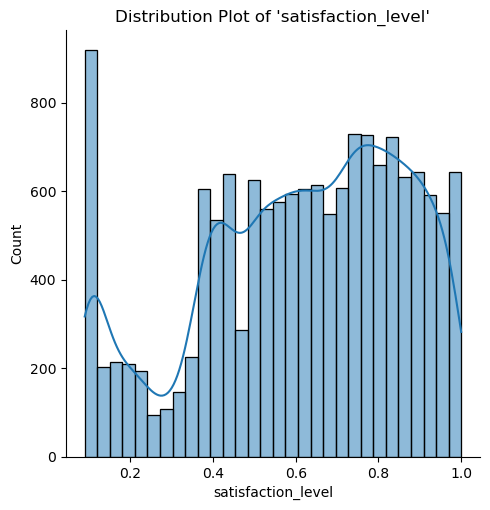

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.displot(df['satisfaction_level'], kde=True, bins=30)  # 'kde=True' adds a Kernel Density Estimate
plt.title("Distribution Plot of 'satisfaction_level'")
plt.show()

C:\Users\al1hj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


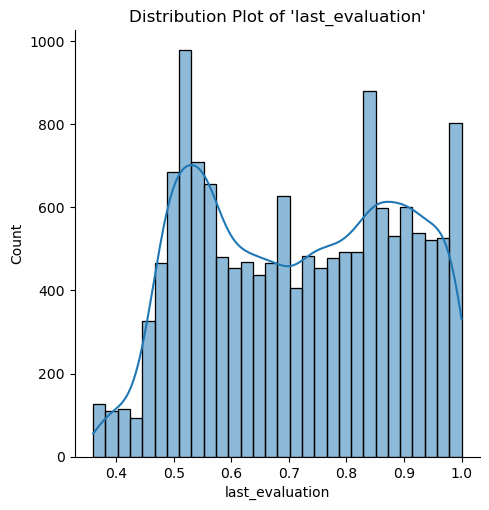

In [11]:
sns.displot(df['last_evaluation'], kde=True, bins=30)  # 'kde=True' adds a Kernel Density Estimate
plt.title("Distribution Plot of 'last_evaluation'")
plt.show()

C:\Users\al1hj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


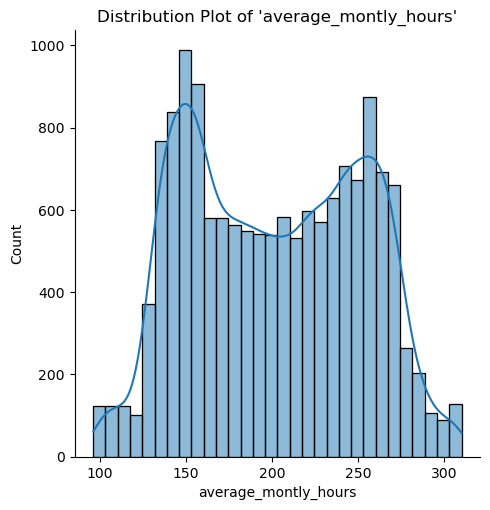

In [12]:
sns.displot(df['average_montly_hours'], kde=True, bins=30)  # 'kde=True' adds a Kernel Density Estimate
plt.title("Distribution Plot of 'average_montly_hours'")
plt.show()

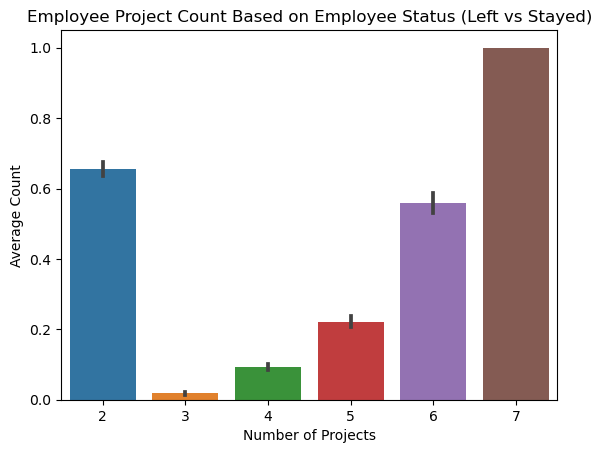

In [23]:
#2.3.	Draw the bar plot of the Employee Project Count of both employees who left and stayed in the organization :
sns.barplot(x='number_project', y='left', data=df)

# Add labels and title
plt.xlabel("Number of Projects")
plt.ylabel("Average Count")
plt.title("Employee Project Count Based on Employee Status (Left vs Stayed)")

# Show the plot
plt.show()

__Observation:__

- Employees who done more projects, they left the company.

C:\Users\al1hj\AppData\Local\Temp\ipykernel_19764\3108602260.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_left['cluster'] = kmeans.fit_predict(X_scaled)


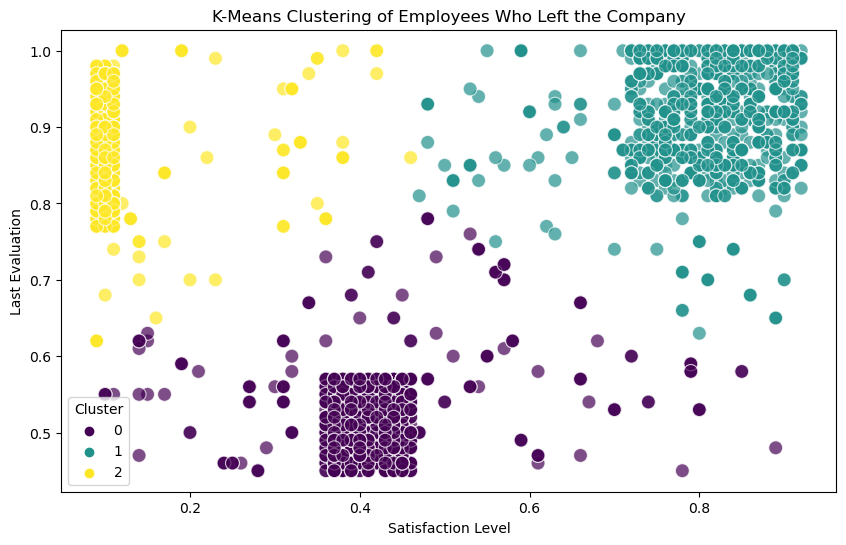

In [24]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df_left = df[df['left'] == 1]
X = df_left[['satisfaction_level', 'last_evaluation']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42)
df_left['cluster'] = kmeans.fit_predict(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df_left, palette='viridis', s=100, alpha=0.7)
plt.title("K-Means Clustering of Employees Who Left the Company")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(title='Cluster')
plt.show()

__Observiation:__
 - Employees with very high Satisfaction Level and their last Evaluation very high too, they left the company.
 - Employees with very low Satisfaction Level and their last Evaluation very high , they left the company.

In [51]:
#- Separating categorical variables and numeric variables.
categorical_cols = dataset.select_dtypes(include=['object']).columns
numeric_cols = dataset.select_dtypes(exclude=['object']).columns

# Apply get_dummies() to the categorical columns
df_categorical = pd.get_dummies(dataset[categorical_cols])

# Combine the numeric columns with the newly transformed categorical columns
df_processed = pd.concat([dataset[numeric_cols], df_categorical], axis=1)

df_processed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_IT,sales_RandD,...,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,...,False,False,False,False,True,False,False,False,True,False


We can see there is an unbalanced data, so we can use SMOTE() technique.

In [28]:
from sklearn.model_selection import train_test_split
X = df_processed.drop(columns='left')  
y = df_processed['left']  # Target variable

# Perform stratified split (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=y)

In [32]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=123)

# Apply SMOTE to the training data
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

5.1.	Train a Logistic Regression model, and plot the classification report

In [44]:
import numpy as np
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


log_reg = LogisticRegression(random_state=123)

# Set up 5-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

# Get cross-validated predictions
y_pred = log_reg.predict(X_train_resampled)
#y_pred_log_reg = cross_val_predict(log_reg, X_train_resampled, y_train_resampled, cv=cv)

# Print classification report
print("Logistic Regression Classification Report:\n")
print(classification_report(y_train_resampled, y_pred))



Logistic Regression Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      9142
           1       0.77      0.81      0.79      9142

    accuracy                           0.78     18284
   macro avg       0.78      0.78      0.78     18284
weighted avg       0.78      0.78      0.78     18284



C:\Users\al1hj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


5.2.	Train a Random Forest Classifier model, and plot the classification report

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Random Forest model
rf = RandomForestClassifier(random_state=123)

# Get cross-validated predictions
y_pred_rf = cross_val_predict(rf, X_train_resampled, y_train_resampled, cv=cv)

# Print classification report
print("Random Forest Classification Report:\n")
print(classification_report(y_train_resampled, y_pred_rf))



Random Forest Classification Report:

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9142
           1       0.99      0.98      0.98      9142

    accuracy                           0.98     18284
   macro avg       0.99      0.98      0.98     18284
weighted avg       0.99      0.98      0.98     18284



5.3.	Train a Gradient Boosting Classifier model, apply the 5-fold CV, and plot the classification report

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Gradient Boosting model
gb = GradientBoostingClassifier(random_state=123)

# Get cross-validated predictions
y_pred_gb = cross_val_predict(gb, X_train_resampled, y_train_resampled, cv=cv)

# Print classification report
print("Gradient Boosting Classification Report:\n")
print(classification_report(y_train_resampled, y_pred_gb))


Gradient Boosting Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      9142
           1       0.98      0.95      0.96      9142

    accuracy                           0.96     18284
   macro avg       0.96      0.96      0.96     18284
weighted avg       0.96      0.96      0.96     18284



C:\Users\al1hj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


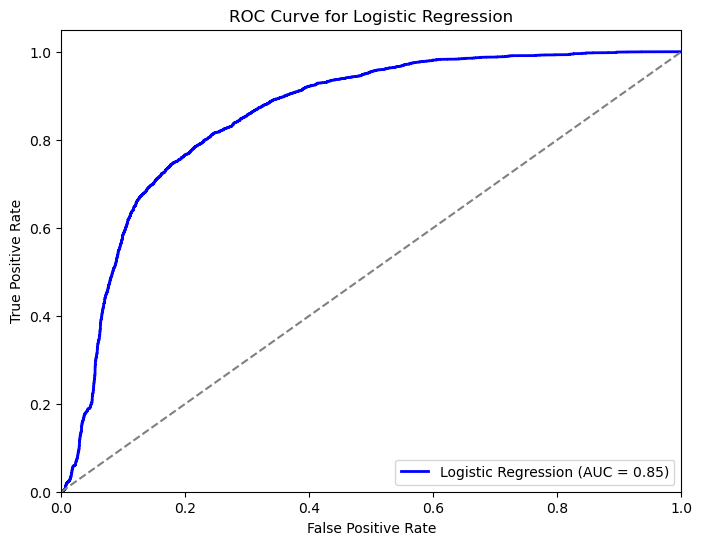

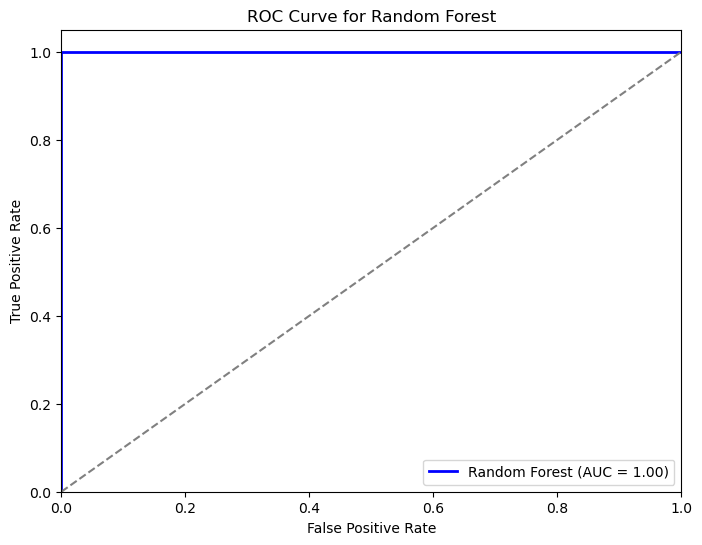

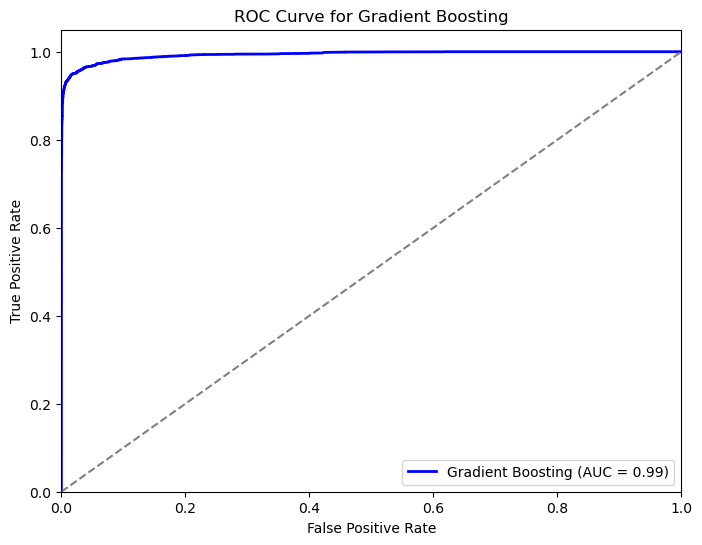

In [47]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize the target labels to apply ROC curve (since it's a binary classification problem)
y_train_binarized = label_binarize(y_train_resampled, classes=[0, 1])  # 0: Stayed, 1: Left

# Function to plot ROC curve and calculate AUC for a model
def plot_roc_curve(model, X_train, y_train, model_name):
    # Get the predicted probabilities
    y_prob = model.predict_proba(X_train)[:, 1]  # Probability of the positive class (left)
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_train, y_prob)
    roc_auc = auc(fpr, tpr)
    
    # Plot the ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc

# Initialize and train each model, then plot ROC curve and calculate AUC
log_reg = LogisticRegression(random_state=123)
log_reg.fit(X_train_resampled, y_train_resampled)
roc_auc_log_reg = plot_roc_curve(log_reg, X_train_resampled, y_train_resampled, "Logistic Regression")

rf = RandomForestClassifier(random_state=123)
rf.fit(X_train_resampled, y_train_resampled)
roc_auc_rf = plot_roc_curve(rf, X_train_resampled, y_train_resampled, "Random Forest")

gb = GradientBoostingClassifier(random_state=123)
gb.fit(X_train_resampled, y_train_resampled)
roc_auc_gb = plot_roc_curve(gb, X_train_resampled, y_train_resampled, "Gradient Boosting")


C:\Users\al1hj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


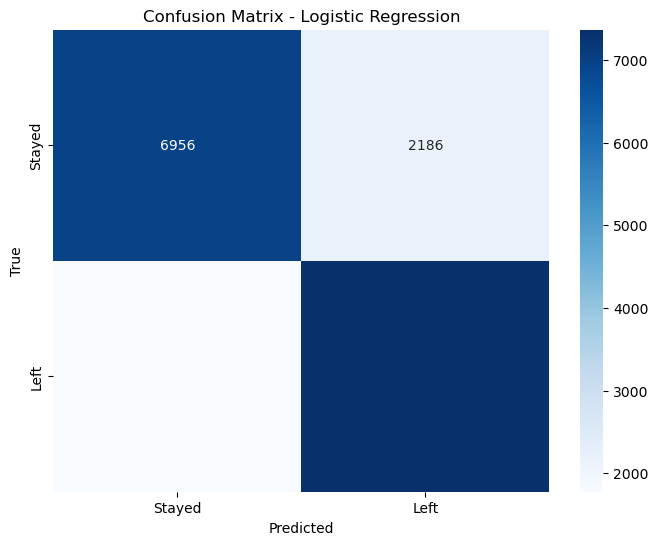

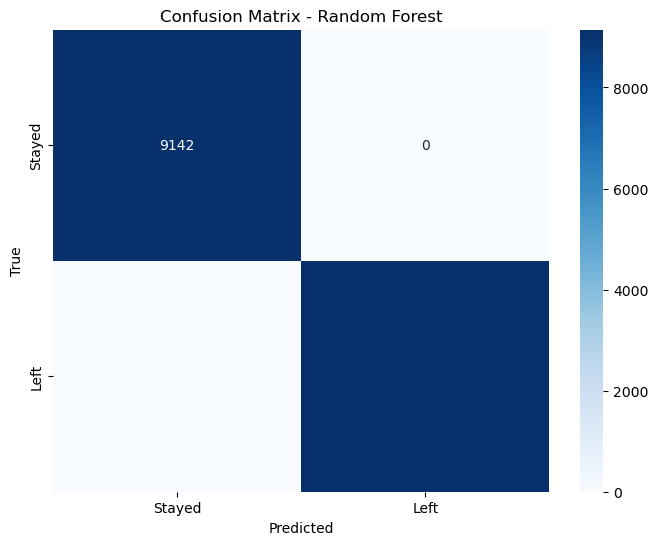

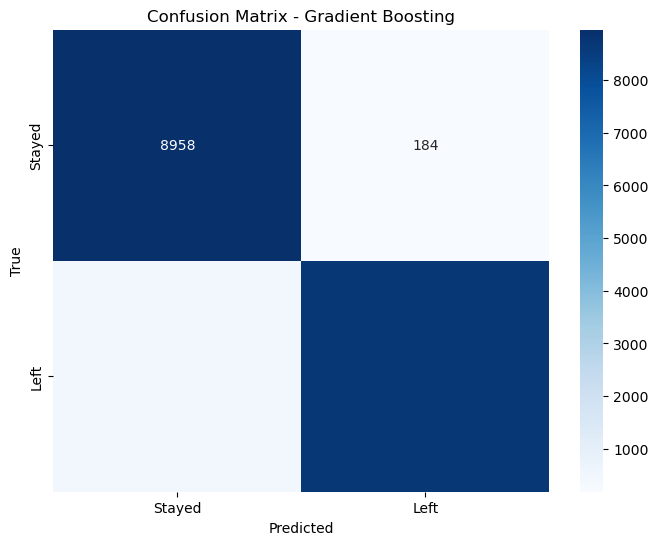

array([[8958,  184],
       [ 450, 8692]], dtype=int64)

In [40]:

import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(model, X_train, y_train, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    cm = confusion_matrix(y_train, y_pred)
    
    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=["Stayed", "Left"], yticklabels=["Stayed", "Left"])
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    return cm

# Plot confusion matrix for each model
plot_confusion_matrix(log_reg, X_train_resampled, y_train_resampled, "Logistic Regression")
plot_confusion_matrix(rf, X_train_resampled, y_train_resampled, "Random Forest")
plot_confusion_matrix(gb, X_train_resampled, y_train_resampled, "Gradient Boosting")


__Observation:__
- For this problem, predicting employees who are likely to leave the company is important, as we might want to take preventive measures to retain them. Therefore, recall might be more important in this case, Because  is important when the cost of missing a positive case is high.

In [49]:

# Fit the selected model on the training dataset (we use the best model here)
best_model = rf 
best_model.fit(X_train_resampled, y_train_resampled)

# Predict the probability of employee turnover on the test dataset
y_prob_test = best_model.predict_proba(X_test)[:, 1]  

# Output the predicted probabilities for the test set
print("Predicted probabilities of employee turnover (test data):")
print(y_prob_test)


Predicted probabilities of employee turnover (test data):
[0.   0.63 0.05 ... 0.04 0.06 1.  ]


__Observation:__
- Employees with a high probability (e.g., above 0.7) of leaving can be flagged as high-risk.